# Import Library

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.preprocessing import MinMaxScaler


In [7]:
# encoder
from sklearn.preprocessing import LabelEncoder

# splitting the data
from sklearn.model_selection import train_test_split

In [8]:
# evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# Data Understanding

In [17]:
import pandas as pd

# Membaca file CSV dengan enkode ISO-8859-1 (Latin-1)
data = pd.read_csv('/content/190623_rumahcom_tangsel_city_unfiltered.csv', encoding='ISO-8859-1')

# Menampilkan data
data


,nav-link href,listing-location,price,bed,bath,listing-floorarea,listing-floorarea 2
0,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","6,9 M",5.0,5.0,420 m²,Rp 20.720.721 per m²
1,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","4,5 M",3.0,3.0,190 m²,Rp 12.747.875 per m²
2,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,95 M",3.0,3.0,132 m²,Rp 30.859.375 per m²
3,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,3 M",4.0,3.0,220 m²,Rp 18.333.333 per m²
4,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,5 M",3.0,2.0,180 m²,Rp 27.777.778 per m²
...,...,...,...,...,...,...,...
15092,https://www.rumah.com/listing-properti/dijual-...,"BSD, Tangerang Selatan, Bintaro, Tangerang Sel...",15 M,10.0,10.0,1000 m²,Rp 30.000.000 per m²
15093,https://www.rumah.com/listing-properti/dijual-...,"Cluster Red Diamond, Serpong Utara, Tangerang ...","3,8 M",4.0,4.0,200 m²,Rp 26.388.889 per m²
15094,https://www.rumah.com/listing-properti/dijual-...,"Jl. W R Supratman, Cemp. Putih, Kec. Ciputat T...","2,3 M",2.0,3.0,117 m²,Rp 20.909.091 per m²
15095,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten","3,5 M",4.0,3.0,350 m²,Rp 16.279.070 per m²


In [18]:
data.shape #mengetahui ukuran data


(15097, 7)

In [19]:
data.columns

Index(['nav-link href', 'listing-location', 'price', 'bed', 'bath',
       'listing-floorarea', 'listing-floorarea 2'],
      dtype='object')

In [20]:
data.dtypes

nav-link href           object
listing-location        object
price                   object
bed                    float64
bath                   float64
listing-floorarea       object
listing-floorarea 2     object
dtype: object

In [21]:
data.isnull().sum()


nav-link href            0
listing-location         1
price                    1
bed                     84
bath                   128
listing-floorarea        1
listing-floorarea 2     26
dtype: int64

In [22]:
data.isnull().mean() * 100

nav-link href          0.000000
listing-location       0.006624
price                  0.006624
bed                    0.556402
bath                   0.847851
listing-floorarea      0.006624
listing-floorarea 2    0.172220
dtype: float64

*missing value* terbanyak ada di bath = 67.4%, dan bed= 45.4%

In [23]:
missing_values = data.isnull().sum()
subset_columns = ['bed', 'bath', 'listing-floorarea 2']
non_missing_counts = data[subset_columns].count()

print("Missing values:", missing_values[subset_columns])
print("Non missing values:", non_missing_counts)


Missing values: bed                     84
bath                   128
listing-floorarea 2     26
dtype: int64
Non missing values: bed                    15013
bath                   14969
listing-floorarea 2    15071
dtype: int64


In [24]:
print(data.duplicated().value_counts())

False    12038
True      3059
dtype: int64


- 24179 : data tidak duplikat
- 5241 data duplikat

In [25]:
print("Jumlah data awal: ",data.shape)


Jumlah data awal:  (15097, 7)


In [26]:
# make a copy of a data frame
df = data.copy()

Berdasarkan data understanding informasi diperoleh :
- Data berjumlah 29420 baris dan 7 kolom
- Terdapat missing value pada bed (46.9%), bath (69.6%), dan area price meter atau listing-floor area 2  (12.5%)
- Duplikat data 5241, dan data tidak duplikat 24179
- Type data object dan float .  

In [27]:
# Menghitung koefisien korelasi
pearson_corr = df.corr(method='pearson')
spearman_corr = df.corr(method='spearman')
kendall_corr = df.corr(method='kendall')

# Menggabungkan koefisien korelasi ke dalam satu DataFrame
correlation_df = pd.concat([pearson_corr, spearman_corr, kendall_corr], axis=1, keys=['Pearson', 'Spearman', 'Kendall'])

# Mencetak hasil
print(correlation_df)


       Pearson            Spearman             Kendall          
           bed      bath       bed      bath       bed      bath
bed   1.000000  0.801191  1.000000  0.817748  1.000000  0.738384
bath  0.801191  1.000000  0.817748  1.000000  0.738384  1.000000


<ipython-input-27-561aec2d746f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pearson_corr = df.corr(method='pearson')
<ipython-input-27-561aec2d746f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman_corr = df.corr(method='spearman')
<ipython-input-27-561aec2d746f>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  kendall_corr = df.corr(method='kendall')


# Data Preprocessing

Proses yang dilakukan
- Rename kolom
- Menghapus kolom link
- Mengubah tipe data object ke numerik
- Menghapus data duplikat
- Memperbaiki missing value


In [28]:
# Membaca file CSV dengan enkode ISO-8859-1 (Latin-1)
data = pd.read_csv('/content/190623_rumahcom_tangsel_city_unfiltered.csv', encoding='ISO-8859-1')


# Rename columns
df = df.rename(columns={
    'nav-link href': 'link',
    'listing-location': 'location',
    'price': 'price',
    'bed': 'bed',
    'bath': 'bath',
    'listing-floorarea': 'area',
    'listing-floorarea 2': 'area_price_meter'
})

df

,link,location,price,bed,bath,area,area_price_meter
0,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","6,9 M",5.0,5.0,420 m²,Rp 20.720.721 per m²
1,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","4,5 M",3.0,3.0,190 m²,Rp 12.747.875 per m²
2,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,95 M",3.0,3.0,132 m²,Rp 30.859.375 per m²
3,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,3 M",4.0,3.0,220 m²,Rp 18.333.333 per m²
4,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,5 M",3.0,2.0,180 m²,Rp 27.777.778 per m²
...,...,...,...,...,...,...,...
15092,https://www.rumah.com/listing-properti/dijual-...,"BSD, Tangerang Selatan, Bintaro, Tangerang Sel...",15 M,10.0,10.0,1000 m²,Rp 30.000.000 per m²
15093,https://www.rumah.com/listing-properti/dijual-...,"Cluster Red Diamond, Serpong Utara, Tangerang ...","3,8 M",4.0,4.0,200 m²,Rp 26.388.889 per m²
15094,https://www.rumah.com/listing-properti/dijual-...,"Jl. W R Supratman, Cemp. Putih, Kec. Ciputat T...","2,3 M",2.0,3.0,117 m²,Rp 20.909.091 per m²
15095,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten","3,5 M",4.0,3.0,350 m²,Rp 16.279.070 per m²


In [29]:
df.columns

Index(['link', 'location', 'price', 'bed', 'bath', 'area', 'area_price_meter'], dtype='object')

In [30]:
df.dtypes

link                 object
location             object
price                object
bed                 float64
bath                float64
area                 object
area_price_meter     object
dtype: object

In [31]:
df=df.drop(['link'], axis=1)
df

,location,price,bed,bath,area,area_price_meter
0,"Gading Serpong, Tangerang Selatan, Banten","6,9 M",5.0,5.0,420 m²,Rp 20.720.721 per m²
1,"Gading Serpong, Tangerang Selatan, Banten","4,5 M",3.0,3.0,190 m²,Rp 12.747.875 per m²
2,"Gading Serpong, Tangerang Selatan, Banten","3,95 M",3.0,3.0,132 m²,Rp 30.859.375 per m²
3,"Gading Serpong, Tangerang Selatan, Banten","3,3 M",4.0,3.0,220 m²,Rp 18.333.333 per m²
4,"Gading Serpong, Tangerang Selatan, Banten","3,5 M",3.0,2.0,180 m²,Rp 27.777.778 per m²
...,...,...,...,...,...,...
15092,"BSD, Tangerang Selatan, Bintaro, Tangerang Sel...",15 M,10.0,10.0,1000 m²,Rp 30.000.000 per m²
15093,"Cluster Red Diamond, Serpong Utara, Tangerang ...","3,8 M",4.0,4.0,200 m²,Rp 26.388.889 per m²
15094,"Jl. W R Supratman, Cemp. Putih, Kec. Ciputat T...","2,3 M",2.0,3.0,117 m²,Rp 20.909.091 per m²
15095,"Bintaro, Tangerang Selatan, Banten","3,5 M",4.0,3.0,350 m²,Rp 16.279.070 per m²


### Mengubah Tipe Data Manual + Encoder

In [32]:
# Mengubah data menjadi numerik
# Mengubah kolom 'price' menjadi nominal Rupiah dalam angka
#df['price'] = df['price'].str.replace(' M', '000000').str.replace(',', '', regex=True).str.replace('[^\d]', '', regex=True).astype(float)

# Menghilangkan " m²" dari kolom 'listing-floorarea'
#df['area'] = df['area'].str.replace(' m²', '', regex=True).astype(int)

# Mengubah kolom 'listing-floorarea 2' menjadi nominal Rupiah dalam angka
#df['area_price_meter'] = df['area_price_meter'].str.replace('Rp ', '', regex=True).str.replace(',', '', regex=True).str.replace('[^\d]', '', regex=True).astype(float)

# Menampilkan data setelah transformasi
#df


In [33]:
# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Loop melalui kolom-kolom yang ingin diubah
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

# Menampilkan data setelah transformasi
df


,location,price,bed,bath,area,area_price_meter
0,1011,1071,5.0,5.0,301,1770
1,1011,839,3.0,3.0,105,527
2,1011,757,3.0,3.0,45,2773
3,1011,706,4.0,3.0,136,1430
4,1011,723,3.0,2.0,94,2544
...,...,...,...,...,...,...
15092,179,426,10.0,10.0,3,2726
15093,732,746,4.0,4.0,114,2439
15094,2759,503,2.0,3.0,23,1793
15095,347,723,4.0,3.0,259,1104


### Mengubah Tipe Data Encode

In [34]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Membaca file CSV dengan enkode ISO-8859-1 (Latin-1)
data = pd.read_csv('/content/190623_rumahcom_tangsel_city_unfiltered.csv', encoding='ISO-8859-1')
data=data.drop(['nav-link href'], axis=1)

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Loop melalui kolom-kolom yang ingin diubah
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

# Menampilkan data setelah transformasi
data


,listing-location,price,bed,bath,listing-floorarea,listing-floorarea 2
0,1287,1295,5.0,5.0,315,2118
1,1287,1018,3.0,3.0,106,620
2,1287,920,3.0,3.0,45,3309
3,1287,858,4.0,3.0,137,1714
4,1287,881,3.0,2.0,95,3032
...,...,...,...,...,...,...
20188,425,79,3.0,2.0,411,2003
20189,356,632,2.0,1.0,2,1402
20190,5459,910,4.0,3.0,115,965
20191,6073,871,2.0,2.0,127,2673


In [35]:
import os

# Assuming 'path_to_save' is the directory where you want to save the CSV file
path_to_save = r'/content/'

# Save the DataFrame to a CSV file
df.to_csv(os.path.join(path_to_save, 'databersih.csv'), index=False)


## Percobaan 1

In [36]:
# Menghapus Duplikat Data
#df.drop_duplicates(keep='first', inplace=True)
print("Jumlah data terbaru: ", df.shape)
print("Jumlah data awal: ",data.shape)

Jumlah data terbaru:  (15097, 6)
Jumlah data awal:  (20193, 6)


**Missing value:**
- 'bed': 138 missing values
- 'bath': 205 missing values
- 'listing-floorarea 2': 37 missing values

Jumlah total data dalam Tentu, berikut adalah teks tanpa rumus matematika dalam format yang lebih sederhana:

Jumlah total data dalam setiap kolom adalah 29,420.

Karena jumlah missing value relatif kecil, maka biasanya disarankan untuk mengisi missing value daripada menghapusnya.

In [37]:
df.columns

Index(['location', 'price', 'bed', 'bath', 'area', 'area_price_meter'], dtype='object')

In [38]:
#Memperbaiki missing value

# Menghitung nilai rata-rata (mean) dari kolom
mean_bed = df['bed'].mean()
mean_bath = df['bath'].mean()
mean_area_price_meter = df['area_price_meter'].mean()

# Mengisi missing values dalam kolom dengan nilai mean
df['bed'].fillna(mean_bed, inplace=True)
df['bath'].fillna(mean_bath, inplace=True)
df['area_price_meter'].fillna(mean_area_price_meter, inplace=True)

#Menampilkan mean dari setiap kolom yang akan diisi
print("Mean Bed:", mean_bed)
print("Mean Bath:", mean_bath)
print("Mean area_price_meter:", mean_area_price_meter)




Mean Bed: 3.7101845067608075
Mean Bath: 2.937871601309373
Mean area_price_meter: 1775.0311982513083


In [39]:
# Menampilkan data setelah mengisi missing values
df


,location,price,bed,bath,area,area_price_meter
0,1011,1071,5.000000,5.000000,301,1770
1,1011,839,3.000000,3.000000,105,527
2,1011,757,3.000000,3.000000,45,2773
3,1011,706,4.000000,3.000000,136,1430
4,1011,723,3.000000,2.000000,94,2544
...,...,...,...,...,...,...
15092,179,426,10.000000,10.000000,3,2726
15093,732,746,4.000000,4.000000,114,2439
15094,2759,503,2.000000,3.000000,23,1793
15095,347,723,4.000000,3.000000,259,1104


In [40]:
df.isnull().mean() * 100

location            0.0
price               0.0
bed                 0.0
bath                0.0
area                0.0
area_price_meter    0.0
dtype: float64

##Exploratory Data Analysis (EDA)

In [41]:
df.describe()

,location,price,bed,bath,area,area_price_meter
count,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000
mean,1857.965622,702.003312,3.710185,2.937872,222.265748,1775.031198
std,1571.497074,404.350072,1.345566,1.338166,148.540240,1053.979916
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,347.000000,357.000000,3.000000,2.000000,79.000000,920.000000
50%,1307.000000,698.000000,3.000000,3.000000,218.000000,1731.000000
75%,3484.000000,1001.000000,4.000000,4.000000,368.000000,2533.000000
max,4891.000000,1483.000000,10.000000,10.000000,460.000000,3898.000000


Axes(0.125,0.11;0.775x0.77)


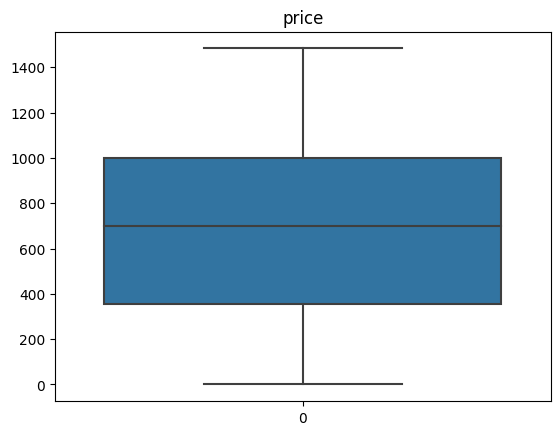

In [42]:
#Membuat Boxplot (contoh pada data price)
plt.title("price")
print(sns.boxplot(df['price']))

Artinya karena data terlalu besar, hingga box-plot tidak terliha sehingga hanya outliers yang terlihat

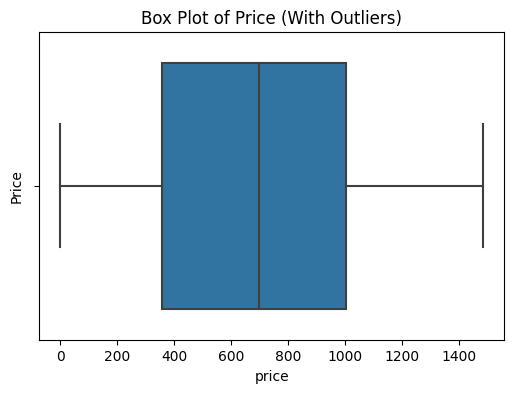

In [43]:
# Membuat boxplot untuk kolom 'price' dan menampilkan outlier
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['price'], showfliers=True)  # Menampilkan outlier
plt.title("Box Plot of Price (With Outliers)")
plt.ylabel("Price")

plt.show()

In [44]:

# Menghitung Q1, Q3, dan IQR
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1

# Menghitung batas atas dan batas bawah untuk outlier
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Mengidentifikasi outlier
outliers = df[(data['price'] < lower_bound) | (df['price'] > upper_bound)]

# Menampilkan outlier
print("Outliers in 'price':")
print(outliers['price'])


Outliers in 'price':
Series([], Name: price, dtype: int64)


<ipython-input-44-103e963e8d30>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = df[(data['price'] < lower_bound) | (df['price'] > upper_bound)]


array([[<Axes: title={'center': 'location'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'bed'}>,
        <Axes: title={'center': 'bath'}>],
       [<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'area_price_meter'}>]], dtype=object)

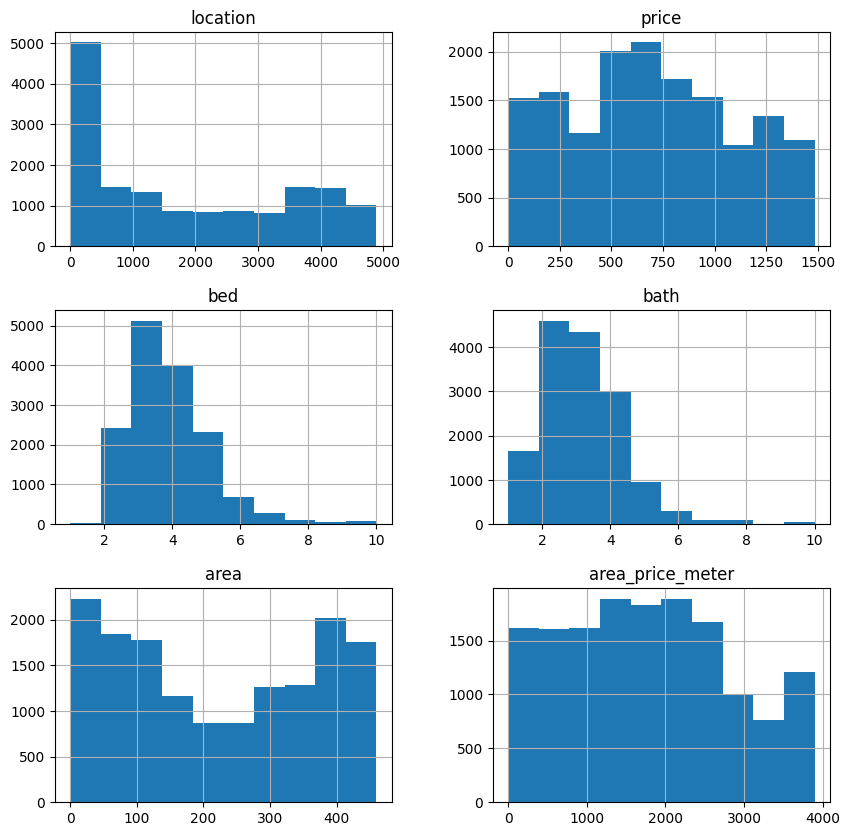

In [45]:
#buat plot hist untuk masing masing kolom
df.hist(figsize=(10,10))

#Multivariate Exploratory Data Analysis

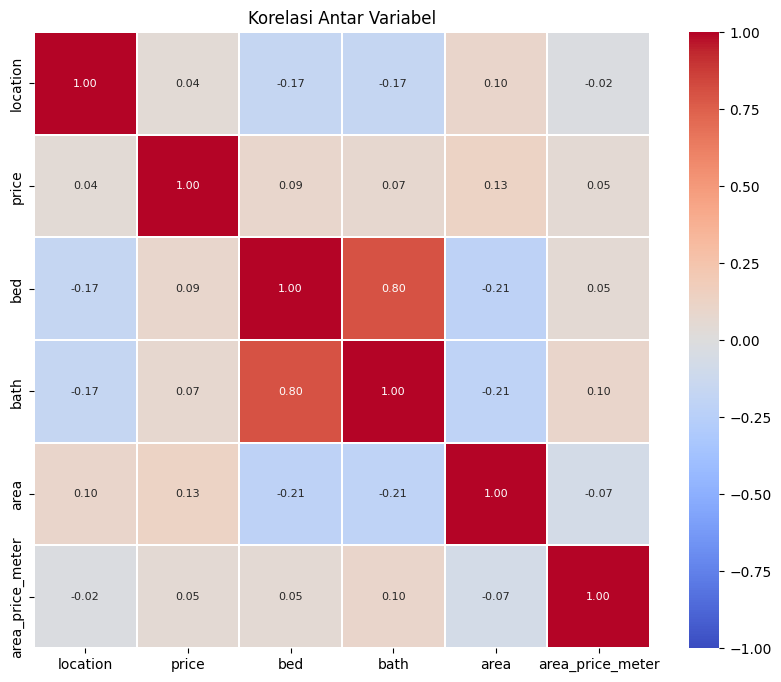

In [46]:
# Fungsi Heatmap
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, vmin=-1, vmax=1, cmap = "coolwarm", annot=True, annot_kws={"size":8}, fmt='.2f', linewidths=0.1, square = True)
plt.title("Korelasi Antar Variabel")
plt.show()

Semakin nilai korelasi mendekati 0 menandakan bahwa tidak ada korelasi antara variabel independen dengan price. Sehingga lebih baik dihapus saja.

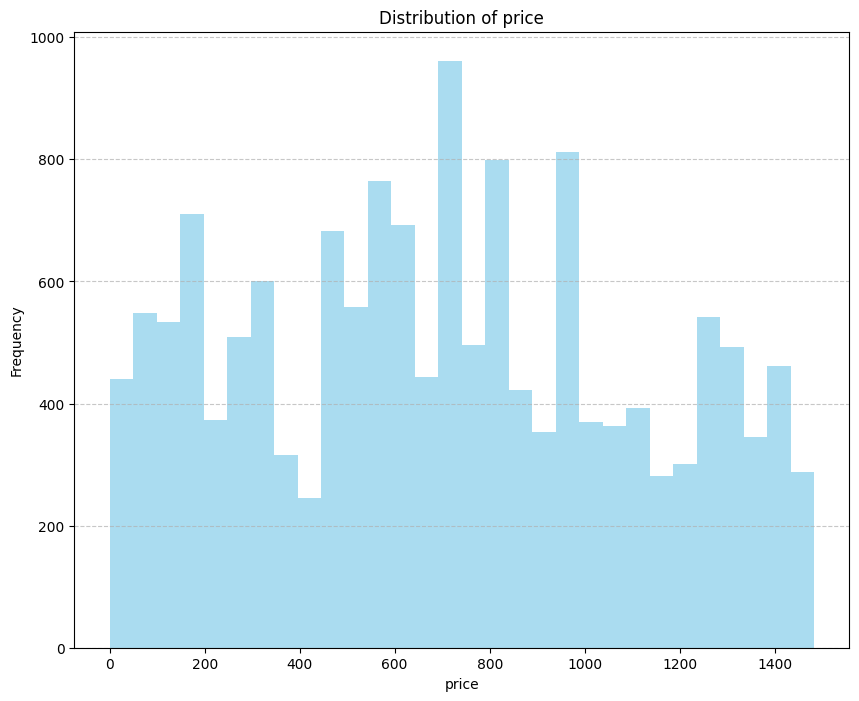

In [47]:
# Memilih kolom yang ingin Anda analisis (contoh: 'price')
selected_column = 'price'

# Membuat histogram untuk melihat persebaran data
plt.figure(figsize=(10, 8))
plt.hist(df[selected_column], bins=30, color='skyblue', alpha=0.7)
plt.title(f'Distribution of {selected_column}')
plt.xlabel(selected_column)
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Modelling Data

In [48]:
#!pip install tensorflow


In [49]:
#!pip install torch


In [50]:
import tensorflow as tf
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.models import Sequential
from keras.optimizers import RMSprop
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [51]:
dfn=df

In [52]:
data.columns

Index(['listing-location', 'price', 'bed', 'bath', 'listing-floorarea',
       'listing-floorarea 2'],
      dtype='object')


Layers LSTM dalam mode Bidirectional
Hidden Layer 64, 128, 1
Fungsi aktivasi LSTM = tanh
Fungsi aktivasi lapisan Dense =Relu layer pertama dan sigmoid yang kedua
Optimizer = Adam
Metrik = Accuracy
Epoch = 5
Batch size =
Regularisasi = L2 pada layer LSTM dengan kernel-regularizer=12


In [53]:
df

,location,price,bed,bath,area,area_price_meter
0,1011,1071,5.000000,5.000000,301,1770
1,1011,839,3.000000,3.000000,105,527
2,1011,757,3.000000,3.000000,45,2773
3,1011,706,4.000000,3.000000,136,1430
4,1011,723,3.000000,2.000000,94,2544
...,...,...,...,...,...,...
15092,179,426,10.000000,10.000000,3,2726
15093,732,746,4.000000,4.000000,114,2439
15094,2759,503,2.000000,3.000000,23,1793
15095,347,723,4.000000,3.000000,259,1104


In [54]:
df=df.drop(['area_price_meter'], axis=1)


In [55]:
df.head()

,location,price,bed,bath,area
0,1011,1071,5.0,5.0,301
1,1011,839,3.0,3.0,105
2,1011,757,3.0,3.0,45
3,1011,706,4.0,3.0,136
4,1011,723,3.0,2.0,94


In [56]:
dfn=df

In [57]:
from sklearn.preprocessing import StandardScaler

# Gabungkan data_normal dan data_attack
X_normal = dfn[['bed', 'bath', 'area']].values
X_attack = dfn[['bed', 'bath', 'area']].values
Y_normal = dfn['price'].values
Y_attack = dfn['price'].values

X = np.concatenate((X_normal, X_attack))
Y = np.concatenate((Y_normal, Y_attack))

# Normalisasi data
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [1]:
Y

NameError: name 'Y' is not defined

In [58]:
for i in range(0,len(Y)):
  if Y[i] =="price":
    Y[i]=0
  else:
    Y[i]=1


In [59]:
features = len(X[0])
samples = X.shape[0]
train_len = 25
input_len = samples - train_len
I = np.zeros((samples - train_len, train_len, features))

for i in range(input_len):
    temp = np.zeros((train_len, features))
    for j in range(i, i + train_len - 1):
        temp[j-i] = X[j]
    I[i] = temp

In [60]:
X.shape


(30194, 3)

# Loss : MSE dan Akurasi : MSE

In [61]:
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# Gabungkan data_normal dan data_attack
X_normal = dfn[['bed', 'bath', 'area']].values
X_attack = dfn[['bed', 'bath', 'area']].values
Y_normal = dfn['price'].values
Y_attack = dfn['price'].values

X = np.concatenate((X_normal, X_attack))
Y = np.concatenate((Y_normal, Y_attack))

# Normalisasi data
scaler = StandardScaler()
X = scaler.fit_transform(X)

for i in range(0, len(Y)):
    if Y[i] == "price":
        Y[i] = 0
    else:
        Y[i] = 1

features = len(X[0])
samples = X.shape[0]
train_len = 25
input_len = samples - train_len
I = np.zeros((samples - train_len, train_len, features))

for i in range(input_len):
    temp = np.zeros((train_len, features))
    for j in range(i, i + train_len - 1):
        temp[j - i] = X[j]
    I[i] = temp

X_train, X_test, Y_train, Y_test = train_test_split(I, Y[25:100000], test_size=0.2)

def create_baseline():
    model = Sequential()
    model.add(Bidirectional(LSTM(64, activation='tanh', kernel_regularizer='l2')))
    model.add(Dense(128, activation='relu', kernel_regularizer='l2'))
    model.add(Dense(1, activation='sigmoid', kernel_regularizer='l2'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    return model

model = create_baseline()
history1 = model.fit(X_train, Y_train, epochs=5, validation_split=0.2, verbose=1)


Epoch 1/5
604/604 [==============================] - 31s 36ms/step - loss: 0.1211 - mean_squared_error: 0.0069 - val_loss: 0.0066 - val_mean_squared_error: 8.8373e-04
Epoch 2/5
604/604 [==============================] - 17s 28ms/step - loss: 0.0062 - mean_squared_error: 8.4048e-04 - val_loss: 0.0054 - val_mean_squared_error: 7.7113e-04
Epoch 3/5
604/604 [==============================] - 16s 27ms/step - loss: 0.0047 - mean_squared_error: 7.1323e-04 - val_loss: 0.0041 - val_mean_squared_error: 6.6062e-04
Epoch 4/5
604/604 [==============================] - 18s 29ms/step - loss: 0.0037 - mean_squared_error: 6.1470e-04 - val_loss: 0.0033 - val_mean_squared_error: 5.7065e-04
Epoch 5/5
604/604 [==============================] - 18s 30ms/step - loss: 0.0030 - mean_squared_error: 5.3002e-04 - val_loss: 0.0027 - val_mean_squared_error: 4.9049e-04


In [64]:
import joblib

# Save the scaler to a file
joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']

### Save Code dalam tensorflow

In [75]:
from keras.models import load_model

# Menyimpan model sebagai file .h5 (HDF5)
model.save("ModelDL.h5")

# Beberapa saat kemudian atau di skrip berbeda, Anda dapat memuat kembali model
loaded_model = load_model("ModelDL.h5")

# Melakukan prediksi menggunakan model yang telah dimuat
predictions = loaded_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


189/189 [==============================] - 2s 7ms/step


In [78]:
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# Gabungkan data_normal dan data_attack
X_normal = dfn[['bed', 'bath', 'area']].values
X_attack = dfn[['bed', 'bath', 'area']].values
Y_normal = dfn['price'].values
Y_attack = dfn['price'].values

X = np.concatenate((X_normal, X_attack))
Y = np.concatenate((Y_normal, Y_attack))

# Normalisasi data
scaler = StandardScaler()
X = scaler.fit_transform(X)

for i in range(0, len(Y)):
    if Y[i] == "price":
        Y[i] = 0
    else:
        Y[i] = 1

features = len(X[0])
samples = X.shape[0]
train_len = 25
input_len = samples - train_len
I = np.zeros((samples - train_len, train_len, features))

for i in range(input_len):
    temp = np.zeros((train_len, features))
    for j in range(i, i + train_len - 1):
        temp[j - i] = X[j]
    I[i] = temp

X_train, X_test, Y_train, Y_test = train_test_split(I, Y[25:100000], test_size=0.2)

def create_baseline():
    model = Sequential()
    model.add(Bidirectional(LSTM(64, activation='tanh', kernel_regularizer='l2')))
    model.add(Dense(128, activation='relu', kernel_regularizer='l2'))
    model.add(Dense(1, activation='sigmoid', kernel_regularizer='l2'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    return model

model = create_baseline()
history1 = model.fit(X_train, Y_train, epochs=5, validation_split=0.2, verbose=1)


Epoch 1/5
604/604 [==============================] - 25s 32ms/step - loss: 0.1213 - mean_squared_error: 0.0075 - val_loss: 0.0067 - val_mean_squared_error: 8.8946e-04
Epoch 2/5
604/604 [==============================] - 17s 29ms/step - loss: 0.0063 - mean_squared_error: 8.4494e-04 - val_loss: 0.0056 - val_mean_squared_error: 7.9558e-04
Epoch 3/5
604/604 [==============================] - 19s 31ms/step - loss: 0.0049 - mean_squared_error: 7.4179e-04 - val_loss: 0.0044 - val_mean_squared_error: 6.8868e-04
Epoch 4/5
604/604 [==============================] - 16s 26ms/step - loss: 0.0039 - mean_squared_error: 6.4203e-04 - val_loss: 0.0035 - val_mean_squared_error: 5.9744e-04
Epoch 5/5
604/604 [==============================] - 16s 27ms/step - loss: 0.0032 - mean_squared_error: 5.5694e-04 - val_loss: 0.0028 - val_mean_squared_error: 5.1789e-04


In [79]:
X_normal

array([[  5.        ,   5.        , 301.        ],
       [  3.        ,   3.        , 105.        ],
       [  3.        ,   3.        ,  45.        ],
       ...,
       [  2.        ,   3.        ,  23.        ],
       [  4.        ,   3.        , 259.        ],
       [  3.71018451,   2.9378716 , 460.        ]])

In [80]:
Y_normal

array([1071,  839,  757, ...,  503,  723, 1483])

In [82]:
X_train

array([[[-0.52781377, -0.70088675,  1.14945221],
        [-1.2710203 , -1.44820307,  0.47621166],
        [-0.52781377, -1.44820307, -1.48291833],
        ...,
        [-0.52781377,  0.04642957,  1.27736791],
        [-1.2710203 , -1.44820307,  0.2809719 ],
        [ 0.        ,  0.        ,  0.        ]],

       [[-0.52781377, -0.70088675,  1.40528362],
        [ 0.21539277,  0.04642957, -1.38193224],
        [ 0.9585993 ,  0.79374589, -1.17322767],
        ...,
        [-1.2710203 , -0.70088675,  0.94074764],
        [-1.2710203 , -0.70088675,  0.94074764],
        [ 0.        ,  0.        ,  0.        ]],

       [[ 0.21539277,  0.04642957, -0.94432589],
        [-1.2710203 , -1.44820307,  0.61085977],
        [-0.52781377,  0.04642957, -0.38553624],
        ...,
        [ 3.93142544,  1.5410622 , -0.0960428 ],
        [ 0.21539277,  0.79374589, -0.47305751],
        [ 0.        ,  0.        ,  0.        ]],

       ...,

       [[-1.2710203 , -1.44820307,  0.2809719 ],
        [ 0

In [88]:
np.unique(Y_train)

array([1])

In [ ]:
#DATA TEST

modeltest = create_baseline()
historytest = modeltest.fit(X_test, Y_test, epochs=5, validation_split=0.2, verbose=1)


Epoch 1/5
295/295 [==============================] - 18s 33ms/step - loss: 0.2432 - mean_squared_error: 0.0131 - val_loss: 0.0073 - val_mean_squared_error: 8.7634e-04
Epoch 2/5
295/295 [==============================] - 7s 25ms/step - loss: 0.0068 - mean_squared_error: 8.9138e-04 - val_loss: 0.0066 - val_mean_squared_error: 8.8379e-04
Epoch 3/5
295/295 [==============================] - 9s 31ms/step - loss: 0.0065 - mean_squared_error: 8.6873e-04 - val_loss: 0.0063 - val_mean_squared_error: 8.4918e-04
Epoch 4/5
295/295 [==============================] - 7s 23ms/step - loss: 0.0059 - mean_squared_error: 8.1152e-04 - val_loss: 0.0054 - val_mean_squared_error: 7.6865e-04
Epoch 5/5
295/295 [==============================] - 9s 31ms/step - loss: 0.0049 - mean_squared_error: 7.3037e-04 - val_loss: 0.0045 - val_mean_squared_error: 6.9426e-04


## Visualisasi Data

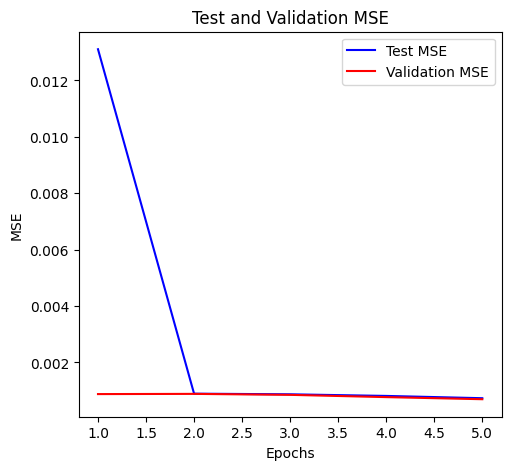

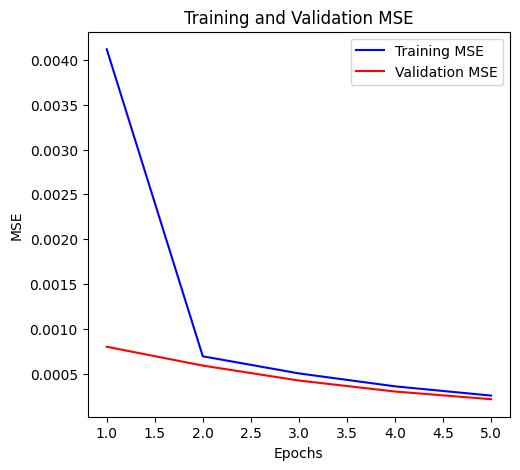

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error


######################## TRAIN ########


# Visualize MSE and validation MSE over epochs
mse = history1.history['mean_squared_error']
val_mse = history1.history['val_mean_squared_error']
epochs = range(1, len(mse) + 1)

plt.figure(figsize=(12, 5))

# Plot MSE and validation MSE
plt.subplot(1, 2, 1)
plt.plot(epochs, mse, 'b', label='Training MSE')
plt.plot(epochs, val_mse, 'r', label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

######################## TEST########


# Visualize MSE and validation MSE over epochs
mse = historytest.history['mean_squared_error']
val_mse = historytest.history['val_mean_squared_error']
epochs = range(1, len(mse) + 1)

plt.figure(figsize=(12, 5))

# Plot MSE and validation MSE
plt.subplot(1, 2, 1)
plt.plot(epochs, mse, 'b', label='Test MSE')
plt.plot(epochs, val_mse, 'r', label='Validation MSE')
plt.title('Test and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()




#### save hasil prediksi

In [ ]:
import os
import pandas as pd

# Predictions on test set
Y_pred = model.predict(X_test)

# Create a DataFrame to store predictions and actual values
results_df = pd.DataFrame({'Actual Price': Y_test, 'Predicted Price': Y_pred.flatten()})

# Specify the directory where you want to save the CSV file
output_directory = '/content/'

# Create the directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Save the DataFrame to a CSV file
results_df.to_csv(os.path.join(output_directory, 'results.csv'), index=False)


368/368 [==============================] - 5s 11ms/step


# Kesimpulan



## Metrik MSE

Hasil dari MSE
* contonya kita ambil 3 saja
Epoch 1/10
* 1177/1177 [==============================] - 29s 20ms/step - loss: 0.0650 - mean_squared_error: 0.0042 - val_loss: 0.0055 - val_mean_squared_error: 7.8308e-04
* Epoch 2/10
1177/1177 [==============================] - 25s 21ms/step - loss: 0.0043 - mean_squared_error: 6.7281e-04 - val_loss: 0.0033 - val_mean_squared_error: 5.7296e-04
* Epoch 3/10
1177/1177 [==============================] - 22s 18ms/step - loss: 0.0027 - mean_squared_error: 4.9024e-04 - val_loss: 0.0021 - val_mean_squared_error: 4.1492e-04....




Loss dan Mean Squared Error (MSE):

* Loss pada data pelatihan (loss) menurun dari 0.0650 ke 8.2457e-04 selama 10
epoch.
* Mean Squared Error (MSE) pada data pelatihan juga menurun dari 0.0042 ke 1.8668e-04.

Validasi Loss dan Validasi MSE:

* Loss pada data validasi (val_loss) menurun dari 0.0055 ke 6.7919e-04 selama 10 epoch.
* Validasi Mean Squared Error (val_mean_squared_error) pada data validasi juga menurun dari 7.8308e-04 ke 1.5864e-04.


Interpretasi:

* Penurunan nilai loss dan MSE pada kedua data pelatihan dan validasi menunjukkan bahwa model mampu belajar dan terus memperbaiki prediksinya seiring berjalannya waktu.
* Nilai MSE yang lebih rendah menunjukkan bahwa model memiliki tingkat kesalahan yang lebih kecil dalam memprediksi target.
Nilai MSE yang mendekati nol menunjukkan bahwa prediksi model hampir sama dengan nilai sebenarnya.

Performa pada Data Validasi:

* Performa model pada data validasi juga terlihat baik dengan penurunan loss dan MSE yang konsisten.


#Deployment

In [2]:
from keras.models import load_model
model = load_model('/content/ModelDL.h5')

In [3]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirecti  (None, 128)               34816     
 onal)                                                           
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 51457 (201.00 KB)
Trainable params: 51457 (201.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Predictions on test set
Y_pred = model.predict(X_test)

# Create a DataFrame to store predictions and actual values
results_df = pd.DataFrame({'Actual Price': Y_test, 'Predicted Price': Y_pred.flatten()})

In [74]:
import numpy as np
from keras.models import load_model
from sklearn.preprocessing import StandardScaler
import joblib

# Load the trained model
loaded_model = load_model("ModelDL.h5")

# Load the scaler from the saved file
scaler = joblib.load("scaler.joblib")

# User input (replace this with your own input)
user_input = {'bed': 3, 'bath': 2, 'area': 400}

# Preprocess user input
user_input_array = np.array([[user_input['bed'], user_input['bath'], user_input['area']]])

# Check the shape of the user_input_array
print("Original Shape:", user_input_array.shape)

user_input_scaled = scaler.transform(user_input_array)

# Check the shape of the scaled input
print("Scaled Shape:", user_input_scaled.shape)

# Reshape the input to match the expected shape for the LSTM model
# Assuming the model expects a sequence length of 25
sequence_length = 25
user_input_reshaped = np.zeros((1, sequence_length, len(user_input_scaled[0])))

# Fill the reshaped array with the user input
user_input_reshaped[:, -1, :] = user_input_scaled

# Check the shape of the reshaped input
print("Reshaped Shape:", user_input_reshaped.shape)

# Make predictions
predicted_price = loaded_model.predict(user_input_reshaped)

# Reshape the predicted_price array
predicted_price_reshaped = predicted_price.reshape(1, 1)

# Invert scaling to get the actual predicted price
predicted_price_actual = scaler.inverse_transform(np.array([[0, 0, predicted_price_reshaped[0, 0]]]))

# Print the predicted price
print("Predicted Price:", predicted_price_actual[0, 2])


Original Shape: (1, 3)
Scaled Shape: (1, 3)
Reshaped Shape: (1, 25, 3)
1/1 [==============================] - 1s 1s/step
Predicted Price: 367.5114388784484


In [81]:
features = np.array([[5,5,301]])
print("Predicted House Price = ", loaded_model.predict(features))

ValueError: ignored